# Lanarkshire GP Boundaries
This is a test notebook for some Lanarkshire GP boundaries just to show the method is robust.

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import shapely
from shapely.ops import unary_union
from shapely.geometry import mapping, Polygon

## Lanarkshire GP Postcodes
We first read in GP information from Lanarkshire.\
**Note**: Make sure the data are separated without space after comma!

In [74]:
lanark = pd.read_excel('./Lanarkshire Sectors.xls') 

In [75]:
lanark.head(5)

,Ref,Former GG&C Code,Practice Code,Practice Name,Contract,Practice Town,Locality,Unit,HSCP,Practice Area as defiend in GMS Contract/17C Agreement
0,1,46269,60054,Jamieson Medical Practice,17J,Chryston,North Locality,North West Unit,North,"G69 0,G69 8,G69 9,G33 6"
1,2,46536,60073,Nalagatla Medical Practice,17J,Stepps,North Locality,North West Unit,North,"G33 6,G33 1,G66 5,G67 4,G69 0,G69 8,G69 9"
2,3,46541,60088,Stepps Surgery,17J,Stepps,North Locality,North West Unit,North,G33 6
3,12,49642,60177,The Craigallian Avenue Practice,17J,Cambuslang,Cambuslang / Rutherglen,South West Unit,South,"G72 7,G72 8"


In [76]:
lanark = lanark.rename(columns = {'Practice Area as defiend in GMS Contract/17C Agreement':  'Sectors'}) # rename

In [77]:
lanark

,Ref,Former GG&C Code,Practice Code,Practice Name,Contract,Practice Town,Locality,Unit,HSCP,Sectors
0,1,46269,60054,Jamieson Medical Practice,17J,Chryston,North Locality,North West Unit,North,"G69 0,G69 8,G69 9,G33 6"
1,2,46536,60073,Nalagatla Medical Practice,17J,Stepps,North Locality,North West Unit,North,"G33 6,G33 1,G66 5,G67 4,G69 0,G69 8,G69 9"
2,3,46541,60088,Stepps Surgery,17J,Stepps,North Locality,North West Unit,North,G33 6
3,12,49642,60177,The Craigallian Avenue Practice,17J,Cambuslang,Cambuslang / Rutherglen,South West Unit,South,"G72 7,G72 8"


In [101]:
#lanark.set_index(['Practice Name']).apply(lambda x: x.str.split(',').explode()).reset_index()
lanarksplit = lanark.set_index(['Practice Code','Practice Name']).Sectors.str.split(',',expand=True).stack().reset_index().rename(columns={0:'Sector'})

In [102]:
lanarksplit = lanarksplit.drop('level_2',1)

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_20656\2642809048.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lanarksplit = lanarksplit.drop('level_2',1)


In [103]:
lanarksplit

,Practice Code,Practice Name,Sector
0,60054,Jamieson Medical Practice,G69 0
1,60054,Jamieson Medical Practice,G69 8
2,60054,Jamieson Medical Practice,G69 9
3,60054,Jamieson Medical Practice,G33 6
4,60073,Nalagatla Medical Practice,G33 6
5,60073,Nalagatla Medical Practice,G33 1
6,60073,Nalagatla Medical Practice,G66 5
7,60073,Nalagatla Medical Practice,G67 4
8,60073,Nalagatla Medical Practice,G69 0
9,60073,Nalagatla Medical Practice,G69 8


In [104]:
lanarksplit.shape

(14, 3)

## Scotland Postcode Sectors Shapefile
Now we read in the postcode sector shape file from NRS.

In [105]:
gdf = gpd.read_file('~/Desktop/GP_Boundaries/Sector_21_1/Sector_21_1.shp')

Check the first few items of the file.

In [106]:
gdf.head(5)

,OBJECTID,Sector,Shape_Leng,Shape_Area,geometry
0,1,AB10 1,7131.510278,7.130118e+05,"POLYGON ((394256.974 806666.497, 394264.000 80..."
1,2,AB10 6,12336.788485,1.505796e+06,"POLYGON ((393348.999 805786.000, 393364.000 80..."
2,3,AB10 7,11424.566022,2.372756e+06,"POLYGON ((393209.011 805132.125, 393206.363 80..."
3,4,AB11 5,13781.980960,1.219767e+06,"POLYGON ((395211.917 806599.168, 395275.000 80..."
4,5,AB11 6,7083.623538,7.724720e+05,"MULTIPOLYGON (((393211.114 805537.072, 393207...."


Check the dimension.

In [107]:
gdf.shape

(957, 5)

## Merging according to postcode sector
We are only interested in the area around Glasgow City. Therefore, we now merge the two data frames and get only the postcode sectors for Glasgow that are present in the Glasgow GP information.

In [108]:
merged = pd.merge(lanarksplit,gdf)

In [109]:
merged

,Practice Code,Practice Name,Sector,OBJECTID,Shape_Leng,Shape_Area,geometry
0,60054,Jamieson Medical Practice,G69 0,476,10423.783293,4.078375e+06,"POLYGON ((270896.401 672086.297, 270904.003 67..."
1,60073,Nalagatla Medical Practice,G69 0,476,10423.783293,4.078375e+06,"POLYGON ((270896.401 672086.297, 270904.003 67..."
2,60054,Jamieson Medical Practice,G69 8,479,26655.269316,1.121063e+07,"POLYGON ((271011.000 670907.000, 271016.000 67..."
3,60073,Nalagatla Medical Practice,G69 8,479,26655.269316,1.121063e+07,"POLYGON ((271011.000 670907.000, 271016.000 67..."
4,60054,Jamieson Medical Practice,G69 9,480,20249.258540,7.411176e+06,"POLYGON ((267744.358 671589.358, 267747.997 67..."
5,60073,Nalagatla Medical Practice,G69 9,480,20249.258540,7.411176e+06,"POLYGON ((267744.358 671589.358, 267747.997 67..."
6,60054,Jamieson Medical Practice,G33 6,405,13283.442521,4.272734e+06,"POLYGON ((266438.952 669747.686, 266446.728 66..."
7,60073,Nalagatla Medical Practice,G33 6,405,13283.442521,4.272734e+06,"POLYGON ((266438.952 669747.686, 266446.728 66..."
8,60088,Stepps Surgery,G33 6,405,13283.442521,4.272734e+06,"POLYGON ((266438.952 669747.686, 266446.728 66..."
9,60073,Nalagatla Medical Practice,G33 1,400,16769.440575,5.074197e+06,"POLYGON ((263854.270 669613.771, 263879.607 66..."


Double check the dimension. This should match with the dimension of the original Glasgow data.

In [110]:
merged.shape

(14, 7)

Sort the data according to the 'CHI' numbers, which present the GP practices.

In [111]:
#gp_merged = merged.groupby('CHI')
gp_merged = merged.sort_values(by=['Practice Code'])

In [112]:
gp_merged

,Practice Code,Practice Name,Sector,OBJECTID,Shape_Leng,Shape_Area,geometry
0,60054,Jamieson Medical Practice,G69 0,476,10423.783293,4.078375e+06,"POLYGON ((270896.401 672086.297, 270904.003 67..."
2,60054,Jamieson Medical Practice,G69 8,479,26655.269316,1.121063e+07,"POLYGON ((271011.000 670907.000, 271016.000 67..."
4,60054,Jamieson Medical Practice,G69 9,480,20249.258540,7.411176e+06,"POLYGON ((267744.358 671589.358, 267747.997 67..."
6,60054,Jamieson Medical Practice,G33 6,405,13283.442521,4.272734e+06,"POLYGON ((266438.952 669747.686, 266446.728 66..."
1,60073,Nalagatla Medical Practice,G69 0,476,10423.783293,4.078375e+06,"POLYGON ((270896.401 672086.297, 270904.003 67..."
3,60073,Nalagatla Medical Practice,G69 8,479,26655.269316,1.121063e+07,"POLYGON ((271011.000 670907.000, 271016.000 67..."
5,60073,Nalagatla Medical Practice,G69 9,480,20249.258540,7.411176e+06,"POLYGON ((267744.358 671589.358, 267747.997 67..."
7,60073,Nalagatla Medical Practice,G33 6,405,13283.442521,4.272734e+06,"POLYGON ((266438.952 669747.686, 266446.728 66..."
9,60073,Nalagatla Medical Practice,G33 1,400,16769.440575,5.074197e+06,"POLYGON ((263854.270 669613.771, 263879.607 66..."
10,60073,Nalagatla Medical Practice,G66 5,467,24113.498884,9.773035e+06,"POLYGON ((270799.000 673152.000, 270704.000 67..."


In [114]:
geomerged = gpd.GeoDataFrame(gp_merged, crs="EPSG:4326")

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_20656\3678873290.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  geomerged = gpd.GeoDataFrame(gp_merged, crs="EPSG:4326")


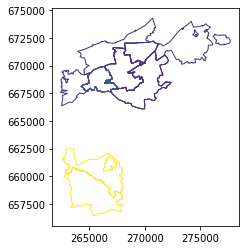

In [117]:
geomerged.plot("Practice Code",facecolors='none')#,legend=True,legend_kwds={'loc':'upper right'})
plt.savefig('test_lanark.pdf', bbox_inches='tight')

## Merging postcode sectors
We are interested in the GP boundaries instead of individual postcode sectors. Therefore, we dissolve the boundaries and merge the sectors.

In [118]:
gp_geomerged = geomerged.dissolve(by='Practice Code')

In [119]:
gp_geomerged

,geometry,Practice Name,Sector,OBJECTID,Shape_Leng,Shape_Area
Practice Code,,,,,,
60054,"POLYGON ((271002.000 670646.000, 270995.000 67...",Jamieson Medical Practice,G69 0,476,10423.783293,4.078375e+06
60073,"MULTIPOLYGON (((263951.414 669614.226, 263951....",Nalagatla Medical Practice,G69 0,476,10423.783293,4.078375e+06
60088,"POLYGON ((266438.952 669747.686, 266446.728 66...",Stepps Surgery,G33 6,405,13283.442521,4.272734e+06
60177,"POLYGON ((267795.000 658455.000, 267839.000 65...",The Craigallian Avenue Practice,G72 7,487,29454.633504,8.876734e+06


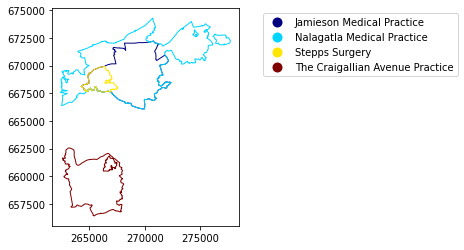

In [124]:
gp_geomerged.plot('Practice Name',facecolor='none',cmap=plt.cm.jet,legend=True,legend_kwds={'bbox_to_anchor':(2.2, 1)})
plt.savefig('lanark_dissolved.pdf', bbox_inches='tight')

In [125]:
gp_geomerged.to_file('./lanark.shp')

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_20656\1311404680.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gp_geomerged.to_file('./lanark.shp')
